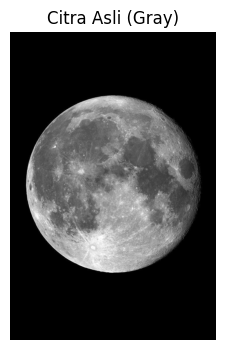

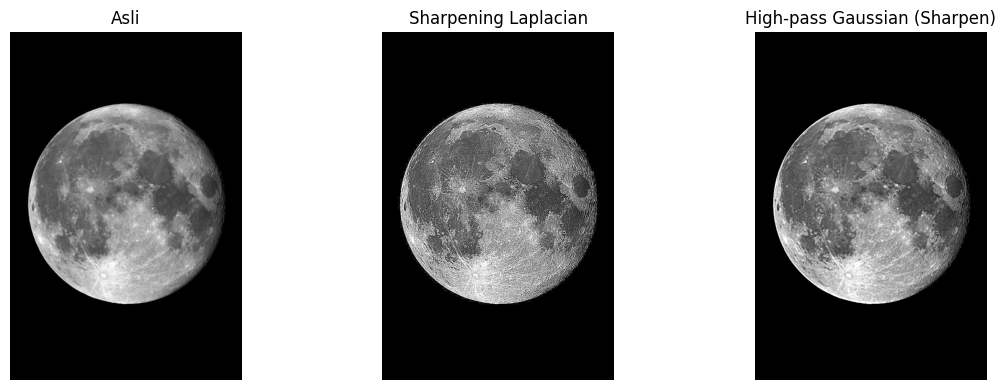

PSNR Laplacian   : 18.36643552721876
PSNR Gaussian HP : 30.597046942397537
SSIM Laplacian   : 0.7248741454668393
SSIM Gaussian HP : 0.9409773684672381

Tabel Perbandingan PSNR/SSIM:
                      Metode       PSNR      SSIM
0       Sharpening Laplacian  18.366436  0.724874
1  High-pass Gaussian (freq)  30.597047  0.940977


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# ----------------- 1. Load Citra -----------------
img_bgr = cv2.imread('bulan.jpg')

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img = gray.astype(np.float32) / 255.0  # normalisasi ke [0,1]

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title('Citra Asli (Gray)')
plt.axis('off')
plt.show()

# ----------------- 2. Sharpening Laplacian (spasial) -----------------
lap = cv2.Laplacian(img, cv2.CV_32F, ksize=3)

alpha = 1.0  # faktor penguat tepi Laplacian
lap_sharp = img - alpha * lap
lap_sharp = np.clip(lap_sharp, 0, 1)

# ----------------- 3. High-pass Gaussian (frekuensi) -----------------
rows, cols = img.shape
u = np.arange(rows)
v = np.arange(cols)
V, U = np.meshgrid(v, u)

D0 = 40
D = np.sqrt((U - rows/2)**2 + (V - cols/2)**2)

H_low = np.exp(-(D**2) / (2 * (D0**2)))
H_high = 1 - H_low

F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

G_shift = H_high * F_shift
G = np.fft.ifftshift(G_shift)
hp_img = np.fft.ifft2(G)
hp_img = np.real(hp_img)

beta = 1.0  # faktor penguat komponen high-pass
hp_sharp = img + beta * hp_img
hp_sharp = np.clip(hp_sharp, 0, 1)

# ----------------- 4. Tampilkan Perbandingan Visual -----------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Asli')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(lap_sharp, cmap='gray')
plt.title('Sharpening Laplacian')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(hp_sharp, cmap='gray')
plt.title('High-pass Gaussian (Sharpen)')
plt.axis('off')

plt.tight_layout()
plt.show()

# ----------------- 5. Hitung PSNR & SSIM -----------------
orig = img.astype(np.float64)
lap_res = lap_sharp.astype(np.float64)
hpf_res = hp_sharp.astype(np.float64)

psnr_lap = peak_signal_noise_ratio(orig, lap_res, data_range=1.0)
psnr_hpf = peak_signal_noise_ratio(orig, hpf_res, data_range=1.0)

ssim_lap = structural_similarity(orig, lap_res, data_range=1.0)
ssim_hpf = structural_similarity(orig, hpf_res, data_range=1.0)

print("PSNR Laplacian   :", psnr_lap)
print("PSNR Gaussian HP :", psnr_hpf)
print("SSIM Laplacian   :", ssim_lap)
print("SSIM Gaussian HP :", ssim_hpf)

# ----------------- 6. Tabel Perbandingan -----------------
data = {
    'Metode' : ['Sharpening Laplacian', 'High-pass Gaussian (freq)'],
    'PSNR'   : [psnr_lap, psnr_hpf],
    'SSIM'   : [ssim_lap, ssim_hpf]
}

df = pd.DataFrame(data)
print("\nTabel Perbandingan PSNR/SSIM:")
print(df)
